# Avacado Project

# Importing necessary libraries :

In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Importing dataset from GitHub Raw link

In [186]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
df.head()  #  Checking top 5 rows.

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [187]:
df.shape # Checking the shape of data set 

(16468, 14)

# Exploratory Data Analysis (EDA)

In [188]:
df.info() # checking some information and data type of data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [189]:
df.columns # Checking column name in data set.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [190]:
df=df.drop(['Unnamed: 0'],axis=1) # as Unnamed column is nominal data and just for indentification. So we are deleting the same
df.head() # Checking again after delete the unammed column.

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [191]:
df.duplicated().sum() # Checking duplicate data this data set.

14950

In [192]:
df=df.drop_duplicates(keep=False)
df.shape

(1517, 13)

In [193]:
df.isnull().sum() # Checking null values in data set after dropping duplicate data.

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [194]:
# there is no any null value in data set.

In [195]:
# We will drop the date column as the year column is also present.
df=df.drop(['Date'],axis=1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [196]:
# Checking unique values of column
df['type'].unique()

array(['conventional'], dtype=object)

In [197]:
# we can also delete this type column as there is only variable in this column and we can not do any comparison with one variable.


In [198]:
    df=df.drop(['type'],axis=1)
    df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany


In [199]:
# Checking unique values of column
df['region'].unique()


array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [200]:
# Checking total number of region column
df['region'].nunique()

51

In [201]:
# Checking Year wise Average Price 

df.groupby('year')['AveragePrice'].mean()

year
2015.0    1.060110
2016.0    1.151498
Name: AveragePrice, dtype: float64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

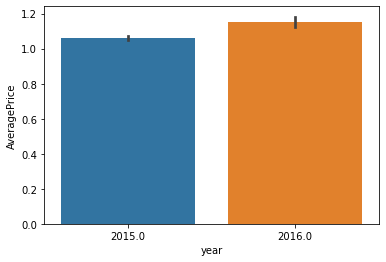

In [202]:
sns.barplot(x='year',y='AveragePrice',data=df)

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

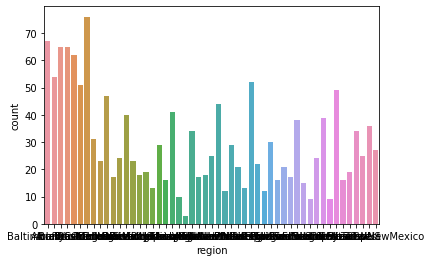

In [203]:
sns.countplot(x=df['region'],data=df)
print(df['region'].value_counts())

In [204]:
# Checking the stats of this dataset with describe method.
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


# Visualization:

In [205]:
# First need to import necessary libray
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [206]:
#Now will check the data distribution with distplot.

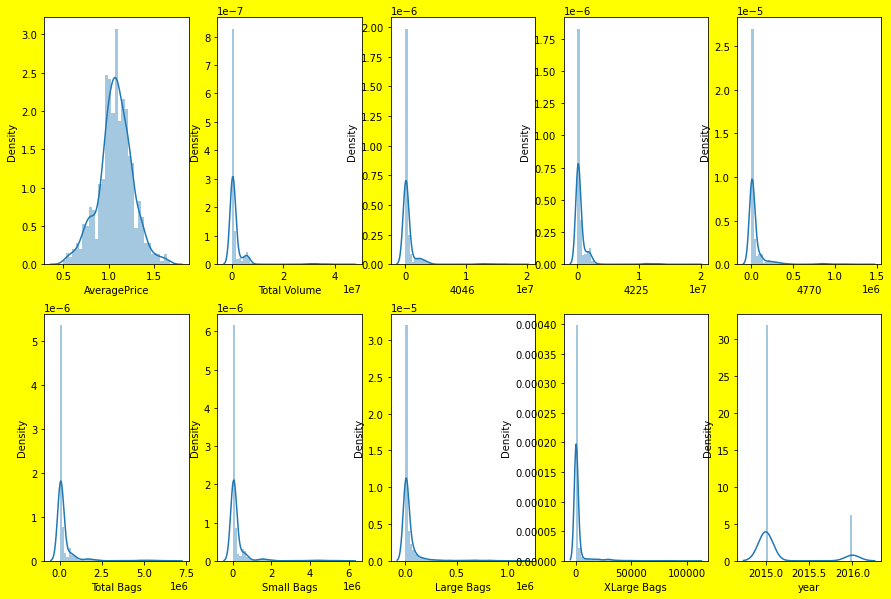

In [207]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    
    plotnumber+=1
    
plt.show()

In [208]:
df.skew() # Checking skewness.

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

In [209]:
# Checking number of unique values in all the columns.

In [210]:
df.nunique()

AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
year               2
region            51
dtype: int64

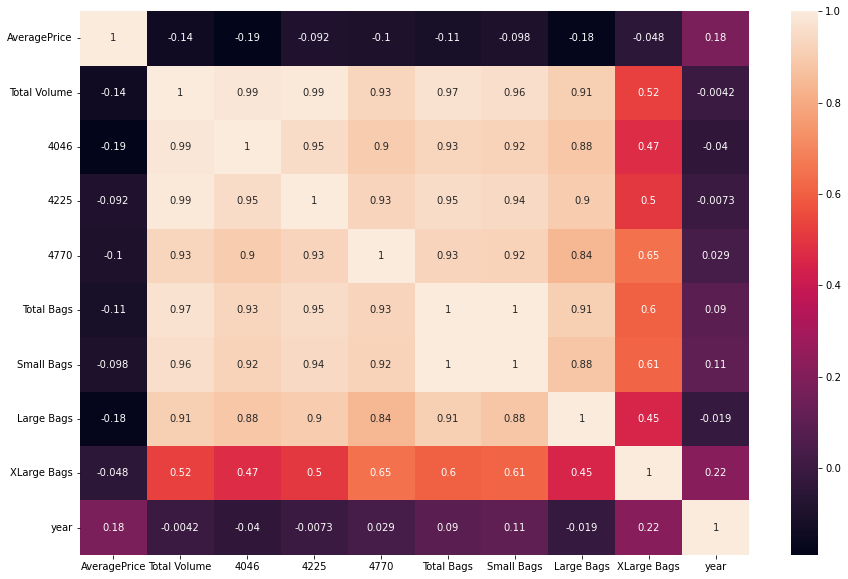

In [211]:
# Plotting heatmap for checking correlation.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Standardization of Features

In [212]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #intiliazed

In [213]:
from sklearn.preprocessing import LabelEncoder # Importing labelencoder for encode the categorical features.
le=LabelEncoder() # intiliazed label encoder.

In [214]:
df['region']=le.fit_transform(df['region']) # Encoding of region (Categorical Column)
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [215]:
x=df.drop(['AveragePrice'],axis=1) 
y=df['AveragePrice']

In [216]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,-0.346966,-0.331490,-0.333053,-0.365608,-0.375994,-0.371055,-0.360044,-0.292727,-0.441008,-1.314338
1,-0.349078,-0.331676,-0.338923,-0.365534,-0.374927,-0.369812,-0.360008,-0.292727,-0.441008,-1.314338
2,-0.334785,-0.331614,-0.300348,-0.365010,-0.376722,-0.371922,-0.359960,-0.292727,-0.441008,-1.314338
3,-0.343636,-0.331441,-0.322576,-0.365431,-0.379802,-0.375576,-0.359701,-0.292727,-0.441008,-1.314338
4,-0.349944,-0.331539,-0.339401,-0.365408,-0.379310,-0.375098,-0.359160,-0.292727,-0.441008,-1.314338


# Outlier Removal using Z-score method

In [217]:
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3 # taking thresold 3 & Checking outliers.
print(np.where(z>3))
df.shape

(array([ 398,  401,  409,  412,  412, 1016, 1017, 1059, 1182, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183, 1183,
       1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185, 1185,
       1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186, 1186,
       1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188, 1188,
       1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1191,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192, 1192,
       1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193, 1194,
       1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196, 1197,
       1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199, 1200,
       1200, 1200, 1200, 1200, 1200, 1200, 1201, 1

(1517, 11)

In [218]:
df.shape  # Checking shape original dataset

(1517, 11)

In [219]:
Data_loss=(1517-1439)*100/1517
print ('Data Loss is ',Data_loss,'%')

Data Loss is  5.1417270929466055 %


In [220]:
df.corr() # Checking correlation of new dataset after outlier removal.

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.470472


# Train Test Split of New Data Set

In [221]:
x=df.drop(['AveragePrice'],axis=1)  # SPlit the data set into x and y variable to predict the Average Price.
y=df['AveragePrice']

In [222]:
from sklearn.model_selection import train_test_split # Import Train Test Split

# Load other Models to predict Average Price

In [223]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Model Building

In [224]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression()]
max_r2_score=0
for r_state in range (40,90):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.25)
    for i in model:
        i.fit(x_train,y_train)
        pre=i.predict(x_test)
        r2_sc=r2_score(y_test,pre)
        print('R2 Score correspond to random state',r_state,'is',r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
            
print()
print()
print()
print()
print('max R2 Score correspond to random state',final_state, 'is',max_r2_score,'and model is',final_model)
            

R2 Score correspond to random state 40 is 0.7027389416807521
R2 Score correspond to random state 40 is 0.733410306462463
R2 Score correspond to random state 40 is 0.198978363207868
R2 Score correspond to random state 41 is 0.7207446383162475
R2 Score correspond to random state 41 is 0.7303097861723735
R2 Score correspond to random state 41 is 0.0989561630902881
R2 Score correspond to random state 42 is 0.6947888750347363
R2 Score correspond to random state 42 is 0.6883977764041445
R2 Score correspond to random state 42 is 0.14676225659398412
R2 Score correspond to random state 43 is 0.6842624238975401
R2 Score correspond to random state 43 is 0.7792753084327009
R2 Score correspond to random state 43 is 0.17157574144474574
R2 Score correspond to random state 44 is 0.4114626624936808
R2 Score correspond to random state 44 is 0.6803738900151723
R2 Score correspond to random state 44 is 0.11429134129793728
R2 Score correspond to random state 45 is 0.6000294063290266
R2 Score correspond to 

In [225]:
# Checking the best parameter for prediction of KNeighborsRegressor algorithm using Grid Search CV.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=87,test_size=0.25)
KN=KNeighborsRegressor()
parameters={'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(KN,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'n_neighbors': 2}

In [226]:
KNN=KNeighborsRegressor(n_neighbors=2) # Predict the Score
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
r2_sc=r2_score(y_test,pred)
print('R2 Score:',r2_sc*100)

R2 Score: 76.85141986873914


In [227]:
print('Mean_Absolute_error',mean_absolute_error(y_test,pred))
print('Mean_Squared_error',mean_squared_error(y_test,pred))
print('Root Mean_absolute_error',np.sqrt(mean_squared_error(y_test,pred)))

Mean_Absolute_error 0.06464473684210527
Mean_Squared_error 0.009024934210526315
Root Mean_absolute_error 0.09499965373898114


Text(0.5, 1.0, 'Average Price (Actual Vs Predcited)')

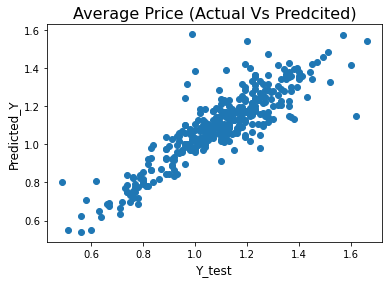

In [228]:
# Checking the diff between Actual and Predicted Score using Graph
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_test',fontsize=12)
plt.ylabel('Predicted_Y',fontsize=12)
plt.title('Average Price (Actual Vs Predcited)', fontsize=16)

Observation:we can see that the actual value and predicted values are very close to each other, so the line is best fit line.

# Prediction with Region (By Classification Model)

In [229]:
# Importing library for Classification Model
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [230]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7


In [231]:
# split the dataframe into x and y considering region as target variable.
x_c=df.drop(['region'],axis=1)
y_c=df['region']

In [237]:
x_c.shape

(1517, 10)

In [238]:
y_c.shape

(1517,)

In [236]:
# standardize of features :
scaler.fit_transform(x_c)


array([[ 1.35048079, -0.34696593, -0.33149016, ..., -0.36004386,
        -0.29272731, -0.44100815],
       [ 1.45639674, -0.34907791, -0.33167633, ..., -0.36000798,
        -0.29272731, -0.44100815],
       [-0.76783831, -0.33478463, -0.33161448, ..., -0.35996017,
        -0.29272731, -0.44100815],
       ...,
       [ 2.14485045, -0.32120275, -0.30820887, ..., -0.29095317,
        -0.1820374 ,  2.26753179],
       [ 2.09189247, -0.31878364, -0.30423037, ..., -0.29078309,
        -0.29272731,  2.26753179],
       [ 1.88006056, -0.3201721 , -0.30987728, ..., -0.26226571,
        -0.29272731,  2.26753179]])

# Model Building

In [254]:
model=[KNeighborsClassifier(),DecisionTreeClassifier()]
max_accuracy_score=0
for r_state in range (40,90):
    xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,random_state=r_state,test_size=.25)
    for i_c in model:
        i_c.fit(xc_train,yc_train)
        pre_c=i_c.predict(xc_test)
        acc_score=accuracy_score(yc_test,pre_c)
        print('Accuracy Score correspond to random state',r_state,'is',acc_score)
        if acc_score> max_accuracy_score:
            max_accuracy_score=acc_score
            final_state=r_state
            final_model=i_c
            
print()
print()
print()
print()
print('max Accuracy Score correspond to random state',final_state, 'is',max_accuracy_score,'and model is',final_model)
            

Accuracy Score correspond to random state 40 is 0.8368421052631579
Accuracy Score correspond to random state 40 is 0.8842105263157894
Accuracy Score correspond to random state 41 is 0.8210526315789474
Accuracy Score correspond to random state 41 is 0.8394736842105263
Accuracy Score correspond to random state 42 is 0.8131578947368421
Accuracy Score correspond to random state 42 is 0.8315789473684211
Accuracy Score correspond to random state 43 is 0.85
Accuracy Score correspond to random state 43 is 0.9
Accuracy Score correspond to random state 44 is 0.8026315789473685
Accuracy Score correspond to random state 44 is 0.8631578947368421
Accuracy Score correspond to random state 45 is 0.7973684210526316
Accuracy Score correspond to random state 45 is 0.8605263157894737
Accuracy Score correspond to random state 46 is 0.7789473684210526
Accuracy Score correspond to random state 46 is 0.8789473684210526
Accuracy Score correspond to random state 47 is 0.8447368421052631
Accuracy Score correspon

In [256]:
# Checking the best parameter for prediction of DecisionTreeClassifier algorithm using Grid Search CV.
xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,random_state=76,test_size=0.25)
DTC=DecisionTreeClassifier()
parameters_c={'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759,76]}
gridsearch=GridSearchCV(DTC,parameters_c)
gridsearch.fit(xc_train,yc_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

In [257]:
GSCV = GridSearchCV(DecisionTreeClassifier(), parameters_c, cv=5)

In [258]:
GSCV.fit(xc_train,yc_train)  # Trained the model.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759, 76],
                         'splitter': ['best', 'random']})

In [260]:
Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=2,  # Again Trained the model with best parameter
                                     random_state=42, splitter="best")
Classifier = Final_Model.fit(xc_train, yc_train)
fmod_pred = Final_Model.predict(xc_test)
fmod_acc = (accuracy_score(yc_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 90.78947368421053


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# Calculating the Cross Validation Score

In [272]:
score=cross_val_score(DTC,x_c,y_c,cv=20,scoring='accuracy').mean()
print('Cross Val Score',score*100)

Cross Val Score 86.94210526315791
